In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

from mgcpy.independence_tests.dcorrx import DCorrX
from mgcpy.independence_tests.mgcx import MGCX
from mgcpy.benchmarks.ts_benchmarks import IndependentAR1, CorrelatedAR1, NonlinearLag1, power_curve

Simple test that everything works.

In [2]:
n = 40
X = np.random.normal(0.0, 1.0, n).reshape(n,1)
Y = np.random.normal(0.0, 1.0, n).reshape(n,1)

max_lag = 0

dcorrx = DCorrX(max_lag = max_lag)
p_value, dcorrx_metadata = dcorrx.p_value(X, Y, is_fast = False)
print("The p_value for DCorrX is: %f" % p_value)

mgcx = MGCX(max_lag = max_lag)
p_value, mgcx_metadata = mgcx.p_value(X, Y, is_fast = False)
print("The p_value for MGCX is: %f" % p_value)

The p_value for DCorrX is: 0.181000
The p_value for MGCX is: 0.173000


(array([839.,  74.,  41.,   4.,   4.,  14.,  13.,   6.,   3.,   2.]),
 array([0.        , 0.02662059, 0.05324118, 0.07986177, 0.10648236,
        0.13310294, 0.15972353, 0.18634412, 0.21296471, 0.2395853 ,
        0.26620589]),
 <a list of 10 Patch objects>)

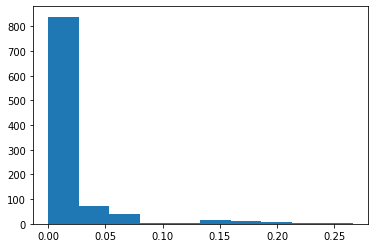

In [3]:
null_dist = mgcx_metadata['null_distribution']
plt.hist(null_dist)

Experiments.

In [4]:
max_lag = 1
num_sims = 40
alpha = 0.05
sample_sizes = range(20, 110, 10)

dcorrx = DCorrX(max_lag = max_lag)
mgcx = MGCX(max_lag = max_lag)

tests = [
    {
        'name' : 'DCorr-X',
        'filename' : 'dcorrx',
        'is_fast' : False,
        'object' : dcorrx,
        'color' : 'red',
    },
    {
        'name' : 'Fast DCorr-X',
        'filename' : 'fast_dcorrx',
        'is_fast' : True,
        'object' : dcorrx,
        'color' : 'blue',
    },
#     {
#         'name' : 'MGC-X',
#         'filename' : 'mgcx',
#         'is_fast' : False,
#         'object' : mgcx,
#         'color' : 'orange',
#     },
#     {
#         'name' : 'Fast MGC-X',
#         'filename' : 'fast_mgcx',
#         'is_fast' : True,
#         'object' : mgcx,
#         'color' : 'green',
#     },
]

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-2)]: Done  32 out of  40 | elapsed:    6.7s remaining:    1.7s
[Parallel(n_jobs=-2)]: Done  37 out of  40 | elapsed:    7.6s remaining:    0.6s
[Parallel(n_jobs=-2)]: Done  40 out of  40 | elapsed:    7.9s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-2)]: Done  32 out of  40 | elapsed:    9.1s remaining:    2.3s
[Parallel(n_jobs=-2)]: Done  37 out of

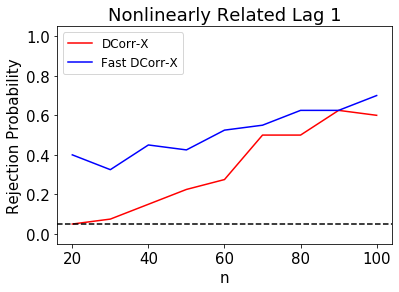

In [5]:
process = NonlinearLag1()
power_curve(tests, process, num_sims, alpha, sample_sizes)